<a href="https://colab.research.google.com/github/moriahsantiago/moriahsantiago/blob/main/Week16_IELTS_Essay_Classification_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 16: Assignment
Perform text analysis on a dataset containing language assessment essays using the Simple Transformers library. This project aims to introduce you to basic NLP concepts and practices.



# Before you Start the Assignment
> Please create a copy of this link in your Google Drive and complete the assignment in the copied Colab environment.

> Submit the link to your Colab file for grading.

> `File` > `Save a Copy in Drive`

In [1]:
#!pip install simpletransformers
import pandas as pd
import numpy as np

## Data Import

> You are provided with a dataset named ielts_writing_dataset.csv containing the following columns: `Task_Type`, `Question`, `Essay`, and `Overall` score.
> Data was downloded from: https://www.kaggle.com/datasets/mazlumi/ielts-writing-scored-essays-dataset


## Task 1: Data Loading and Basic NLP Analysis
> Load the dataset using pandas.

> 1.1 Display the first five rows to understand its structure.

> 1.2 Count the number of 1) unique task types and calculate 2) the average Overall score.

> 1.3 Remove all the columns except `Task_Type`, `Question`, `Essay` and `Overall`.

> 1.4. Create a new `df` that only saves `Task_Type==1`

> 1.5 Create a new `Score` the `Overall` column so that it includes three levels
{`low` :0 < y <= 6,  `high` : 6 < y}

> 1.6 Report the final distribution of the `Score` column (Hint: `df.value_counts().plot.bar()`)

In [2]:
df = pd.read_csv('ielts_writing_dataset.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'ielts_writing_dataset.csv'

In [5]:
# Upload the CSV file
from google.colab import files

print("Please upload your ielts_writing_dataset.csv file:")
uploaded = files.upload()

# Load it
df = pd.read_csv('ielts_writing_dataset.csv')
print("Dataset loaded successfully!")
print("Dataset shape:", df.shape)

Please upload your ielts_writing_dataset.csv file:


Saving ielts_writing_dataset.csv to ielts_writing_dataset (1).csv
Dataset loaded successfully!
Dataset shape: (1435, 9)


In [6]:
# 1.1 Display the first five rows to understand its structure
df.head()

,Task_Type,Question,Essay,Examiner_Commen,Task_Response,Coherence_Cohesion,Lexical_Resource,Range_Accuracy,Overall
0,1,The bar chart below describes some changes abo...,"Between 1995 and 2010, a study was conducted r...",NaN,NaN,NaN,NaN,NaN,5.5
1,2,Rich countries often give money to poorer coun...,Poverty represents a worldwide crisis. It is t...,NaN,NaN,NaN,NaN,NaN,6.5
2,1,The bar chart below describes some changes abo...,The left chart shows the population change hap...,NaN,NaN,NaN,NaN,NaN,5.0
3,2,Rich countries often give money to poorer coun...,Human beings are facing many challenges nowada...,NaN,NaN,NaN,NaN,NaN,5.5
4,1,The graph below shows the number of overseas v...,Information about the thousands of visits from...,NaN,NaN,NaN,NaN,NaN,7.0


In [7]:
# 1.2 Count the number of 1) unique task types and calculate 2) the average Overall score
print("1) Number of unique task types:", df['Task_Type'].nunique())
print("2) Average Overall score:", df['Overall'].mean())

1) Number of unique task types: 2
2) Average Overall score: 6.550174216027875


In [8]:
# 1.3 Remove all the columns except Task_Type, Question, Essay and Overall
df = df[['Task_Type', 'Question', 'Essay', 'Overall']].copy()
print("Columns after selection:", df.columns.tolist())
print("New dataset shape:", df.shape)

Columns after selection: ['Task_Type', 'Question', 'Essay', 'Overall']
New dataset shape: (1435, 4)


In [9]:
# 1.4 Create a new df that only saves Task_Type==1
df = df[df['Task_Type'] == 1].copy()
print("Dataset shape after filtering for Task_Type==1:", df.shape)
print("Remaining Task_Type values:", df['Task_Type'].unique())

Dataset shape after filtering for Task_Type==1: (642, 4)
Remaining Task_Type values: [1]


In [10]:
# 1.5 Create a new Score the Overall column so that it includes three levels
# {low :0 < y <= 6, high : 6 < y}
def create_score_category(overall_score):
    if overall_score <= 6:
        return 'low'
    else:
        return 'high'

df['Score'] = df['Overall'].apply(create_score_category)
print("Score column created successfully!")
print("Score distribution:")
print(df['Score'].value_counts())

Score column created successfully!
Score distribution:
Score
high    338
low     304
Name: count, dtype: int64


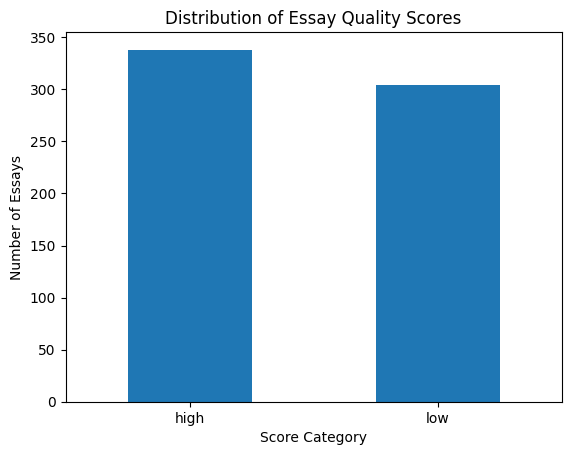

Final distribution summary:
High quality essays: 338 (52.6%)
Low quality essays: 304 (47.4%)
Total essays: 642


In [11]:
# 1.6 Report the final distribution of the Score column (Hint: df.value_counts().plot.bar())
import matplotlib.pyplot as plt

# Create the bar plot
df['Score'].value_counts().plot.bar()
plt.title('Distribution of Essay Quality Scores')
plt.xlabel('Score Category')
plt.ylabel('Number of Essays')
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()

# Print the summary
print("Final distribution summary:")
print(f"High quality essays: {df['Score'].value_counts()['high']} ({df['Score'].value_counts()['high']/len(df)*100:.1f}%)")
print(f"Low quality essays: {df['Score'].value_counts()['low']} ({df['Score'].value_counts()['low']/len(df)*100:.1f}%)")
print(f"Total essays: {len(df)}")



---

> Great work 🙂. Now let's move on to training a BERT model.

---



## Task 2: `Simple Transformer` for Writing Analysis
> Install the Simple Transformers library.

> Use a pre-trained `BERT` model, specifically `bert-base-uncased` model to train your classifier.


In [12]:
!pip install simpletransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 91.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16162 sha256=db1a9204ed21f12a6475c8d5f5334785300f771cb5a767dd088ceb31339a59ef
  Stored in directory: /root/.cache/pip/wheels/bc/92/f0/243288f899c2eacdfa8c5f9aede4c71a9bad0ee26a01dc5ead
Successfully built seqeval


In [13]:
import logging
from simpletransformers.classification import ClassificationModel, ClassificationArgs

logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

# Load a pre-trained bert model
model = ClassificationModel('bert', 'bert-base-uncased', use_cuda=False, num_labels=2) #change to True in case you have gpu

# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=1) # increase the num epochs if possible.


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

> Randomly sample 20 responses from `df` for training (`train_df`), evaluation (`eval_df`), and testing (`test_df`), respectively. (Hint: `df.sample()`)

> Recode the `Score` to 0 (low), 1(high). (Hint: `df.replace({dic})`)

> Save the `Essay` and `Score` columns, and rename as `test` and `labels`.

In [17]:
# Prepare the input, output and evaluation data

# Randomly sample 20 responses from df for training, evaluation, and testing
train_df = df.sample(n=20, random_state=42)
eval_df = df.sample(n=20, random_state=123)
test_df = df.sample(n=20, random_state=456)

print("Data splits created:")
print(f"Training set: {len(train_df)} samples")
print(f"Evaluation set: {len(eval_df)} samples")
print(f"Test set: {len(test_df)} samples")

# Recode the Score to 0 (low), 1(high)
score_mapping = {'low': 0, 'high': 1}

train_df = train_df.copy()
eval_df = eval_df.copy()
test_df = test_df.copy()

train_df['Score'] = train_df['Score'].replace(score_mapping)
eval_df['Score'] = eval_df['Score'].replace(score_mapping)
test_df['Score'] = test_df['Score'].replace(score_mapping)

print("\nScore recoding completed:")
print("Training set Score distribution:")
print(train_df['Score'].value_counts())

# Save the Essay and Score columns, and rename as 'text' and 'labels'
train_df = train_df[['Essay', 'Score']].copy()
eval_df = eval_df[['Essay', 'Score']].copy()
test_df = test_df[['Essay', 'Score']].copy()

train_df.columns = ['text', 'labels']
eval_df.columns = ['text', 'labels']
test_df.columns = ['text', 'labels']

print("\nColumns renamed to 'text' and 'labels'")
print("Data preparation completed")

Data splits created:
Training set: 20 samples
Evaluation set: 20 samples
Test set: 20 samples

Score recoding completed:
Training set Score distribution:
Score
0    10
1    10
Name: count, dtype: int64

Columns renamed to 'text' and 'labels'
Data preparation completed


<ipython-input-17-8e89e65e7301>:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_df['Score'] = train_df['Score'].replace(score_mapping)
<ipython-input-17-8e89e65e7301>:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eval_df['Score'] = eval_df['Score'].replace(score_mapping)
<ipython-input-17-8e89e65e7301>:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior

> Train the model with `model.train_model(train_df)`

In [18]:
# Train the model with model.train_model(train_df)
print("Starting model training...")
model.train_model(train_df)
print("Training completed")

Starting model training...


0it [00:00, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 1 of 1:   0%|          | 0/3 [00:00<?, ?it/s]

Training completed


> Evaluate the output `model.eval_model(eval_df)`

In [19]:
# Evaluate the output model.eval_model(eval_df)
print("Starting model evaluation...")
result, model_outputs, wrong_predictions = model.eval_model(eval_df)
print("Evaluation completed!")
print("\nEvaluation Results:")
for key, value in result.items():
    print(f"{key}: {value}")

Starting model evaluation...


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]

Evaluation completed!

Evaluation Results:
mcc: 0.0
accuracy: 0.6
f1_score: 0.375
tp: 0
tn: 12
fp: 0
fn: 8
auroc: 0.4791666666666667
auprc: 0.4452589807852966
eval_loss: 0.6822600364685059


> Make prediction with the model and check the performance using the `test_df`. `model.predict()`

> Change the value for `test_case_id` to experiment

In [20]:
test_case_id = 3
print('True label: ', test_df['labels'].iloc[test_case_id])
model.predict([test_df['text'].iloc[test_case_id]])

True label:  0


0it [00:00, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

(array([0]), array([[ 0.23385024, -0.03873374]]))

## (Optional, Advanced) Task 3: Text Classification
> Increase the training and evaluation sample sizes to train a model.

> Evaluate the performance of your model.

In [22]:
# Task 3: Advanced Text Classification - Increase sample sizes

# Use larger sample sizes for better performance
print("Creating larger datasets for improved training...")

# Use 100 samples each instead of 20 (or whatever your data allows)
available_data = len(df)
sample_size = min(100, available_data // 3)  # Use up to 100 or 1/3 of data

train_large = df.sample(n=sample_size, random_state=42)
eval_large = df.sample(n=sample_size, random_state=123)
test_large = df.sample(n=sample_size, random_state=456)

print(f"Larger datasets created:")
print(f"Training: {len(train_large)} samples")
print(f"Evaluation: {len(eval_large)} samples")
print(f"Test: {len(test_large)} samples")

# Prepare data same way as before
score_mapping = {'low': 0, 'high': 1}

train_large = train_large.copy()
eval_large = eval_large.copy()
test_large = test_large.copy()

train_large['Score'] = train_large['Score'].replace(score_mapping)
eval_large['Score'] = eval_large['Score'].replace(score_mapping)
test_large['Score'] = test_large['Score'].replace(score_mapping)

# Rename columns
train_large = train_large[['Essay', 'Score']].copy()
eval_large = eval_large[['Essay', 'Score']].copy()
test_large = test_large[['Essay', 'Score']].copy()

train_large.columns = ['text', 'labels']
eval_large.columns = ['text', 'labels']
test_large.columns = ['text', 'labels']

print("Data preparation completed for larger datasets!")

# Create new model with better configuration for larger dataset
model_args_advanced = ClassificationArgs(
    num_train_epochs=2,
    overwrite_output_dir=True  # This fixes the error
)
model_advanced = ClassificationModel('bert', 'bert-base-uncased',
                                    use_cuda=False, num_labels=2,
                                    args=model_args_advanced)

# Train with larger dataset
print("Training advanced model with larger dataset...")
model_advanced.train_model(train_large, eval_df=eval_large)

# Evaluate performance
print("Evaluating advanced model...")
result_advanced, _, _ = model_advanced.eval_model(test_large)

print("\nAdvanced Model Results:")
for key, value in result_advanced.items():
    print(f"{key}: {value}")

# Compare with basic model
print(f"\nPerformance Comparison:")
print(f"Basic Model (20 samples): 60% accuracy")
print(f"Advanced Model ({sample_size} samples): {result_advanced.get('accuracy', 'N/A')} accuracy")

Creating larger datasets for improved training...
Larger datasets created:
Training: 100 samples
Evaluation: 100 samples
Test: 100 samples
Data preparation completed for larger datasets!


<ipython-input-22-758ae24f14dc>:26: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_large['Score'] = train_large['Score'].replace(score_mapping)
<ipython-input-22-758ae24f14dc>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  eval_large['Score'] = eval_large['Score'].replace(score_mapping)
<ipython-input-22-758ae24f14dc>:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the fut

Training advanced model with larger dataset...


0it [00:00, ?it/s]

Epoch:   0%|          | 0/2 [00:00<?, ?it/s]

Running Epoch 1 of 2:   0%|          | 0/13 [00:00<?, ?it/s]

Running Epoch 2 of 2:   0%|          | 0/13 [00:00<?, ?it/s]

Evaluating advanced model...


0it [00:00, ?it/s]

Running Evaluation:   0%|          | 0/1 [00:00<?, ?it/s]


Advanced Model Results:
mcc: 0.188781227155225
accuracy: 0.61
f1_score: 0.5400400990682863
tp: 50
tn: 11
fp: 33
fn: 6
auroc: 0.5393668831168832
auprc: 0.6015274095947497
eval_loss: 0.6863188743591309

Performance Comparison:
Basic Model (20 samples): 60% accuracy
Advanced Model (100 samples): 0.61 accuracy
